In [ ]:
from os import system, listdir, chdir, mkdir
from os.path import isdir
import os
import random                                   
path_klebsiella="/home/conchae/prediction_depolymerase_tropism"     
path_phispy="/home/conchae/prediction_depolymerase_tropism/prophage_prediction/phispy/phispy_prediction"
good_strains=open(f"{path_klebsiella}/results_kleborate_count.tsv").read().split("\n")

dico_r1={}
for index_strain, line in enumerate(good_strains) :
    if line and index_strain > 0: 
        k_type=line.split("\t")[2].strip()
        strain=line.split("\t")[0].strip()
        specie=line.split("\t")[1].strip()
        if k_type not in dico_r1:
            dico_r2={"Klebsiella aerogenes" : 0,
                     "Klebsiella africana" : 0,
                     "Klebsiella grimontii" : 0,
                     "Klebsiella huaxiensis" : 0,
                     "Klebsiella indica" : 0,
                     "Klebsiella michiganensis" : 0,
                     "Klebsiella oxytoca" : 0,
                     "Klebsiella pasteurii" : 0,
                     "Klebsiella pneumoniae" : 0,
                     "Klebsiella quasipneumoniae": 0,
                     "Klebsiella quasivariicola" : 0,
                     "Klebsiella spallanzanii" : 0,
                     "Klebsiella variicola" : 0,
                     "Prophage count Phispy": 0}
            dico_r2[specie]=dico_r2[specie]+1
            dico_r1[k_type]=dico_r2
            if os.path.isfile(f"{path_phispy}/{strain}/prophage.tsv")==True and os.stat(f"{path_phispy}/{strain}/prophage.tsv").st_size > 0:
                prophage_out=open(f"{path_phispy}/{strain}/prophage.tsv").read().split("\n")[1:]
                dico_r1[k_type]["Prophage count Phispy"]=dico_r1[k_type]["Prophage count Phispy"]+len(prophage_out)
        else :
            dico_r1[k_type][specie]=dico_r1[k_type][specie]+1
            if os.path.isfile(f"{path_phispy}/{strain}/prophage.tsv")==True and os.stat(f"{path_phispy}/{strain}/prophage.tsv").st_size > 0:
                prophage_out=open(f"{path_phispy}/{strain}/prophage.tsv").read().split("\n")[1:]
                dico_r1[k_type]["Prophage count Phispy"]=dico_r1[k_type]["Prophage count Phispy"]+len(prophage_out)
                
for k_type in dico_r1 :
    n=0
    for specie in dico_r1[k_type]:
        if specie != "Prophage count Phispy":
            n=n+dico_r1[k_type][specie]
    d2={"Total number strain": n}
    dico_r1[k_type].update(d2)
    print(n)
    
species=["Klebsiella aerogenes","Klebsiella africana","Klebsiella grimontii","Klebsiella huaxiensis","Klebsiella indica","Klebsiella michiganensis","Klebsiella oxytoca","Klebsiella pasteurii","Klebsiella pneumoniae","Klebsiella quasipneumoniae","Klebsiella quasivariicola","Klebsiella spallanzanii","Klebsiella variicola"]              
with open(f"{path_klebsiella}/results_R1_file.tsv","w") as outfile :
    outfile.write(f"K serotype\t")
    for specie in species :
        outfile.write(f"{specie}\t")
    outfile.write("Total number strains\tProphage count Phispy\n")
    for k_type in dico_r1 :
        outfile.write(f"{k_type}\t")
        for index_spe, specie in enumerate(species):
            outfile.write(f"{dico_r1[k_type][specie]}\t")
        outfile.write(f"{dico_r1[k_type]['Total number strain']}\t{dico_r1[k_type]['Prophage count Phispy']}\n") 


# ******************************************************************************************************************************************************        
from os import system, listdir, chdir, mkdir
from os.path import isdir
import os

path_klebsiella="/home/conchae/prediction_depolymerase_tropism"     
path_phispy="/home/conchae/prediction_depolymerase_tropism/prophage_prediction/phispy/phispy_prediction"
good_strains=open(f"{path_klebsiella}/results_kleborate_count.tsv").read().split("\n")

with open(f"{path_klebsiella}/results_R1_file.complete.tsv", "w") as outfile :
    for index_strain, line in enumerate(good_strains) :
        if line and index_strain > 0: 
            k_type=line.split("\t")[2].strip()
            strain=line.split("\t")[0].strip()
            specie=line.split("\t")[1].strip()
            if os.stat(f"{path_phispy}/{strain}/prophage.tsv").st_size > 0 :
                pro_file=open(f"{path_phispy}/{strain}/prophage.tsv").read().split("\n")[1:]
                for index_pro, pro_info in enumerate(pro_file):
                    if pro_info:
                        pro_tag=pro_info.split('\t')[1]
                        pro_name=f"{pro_tag}_PP{str(index_pro+1)}"
                        tamano=0
                        if int(pro_info.split("\t")[2]) < int(pro_info.split("\t")[3]) :
                            tamano=str(int(pro_info.split("\t")[3]) - int(pro_info.split("\t")[2]))
                        else :
                            tamano=str(int(pro_info.split("\t")[2]) - int(pro_info.split("\t")[3]))
                        outfile.write(f"{specie}\t{strain}\t{k_type}\t{pro_name}\t{tamano}\n")

In [ ]:
from os import system, listdir, chdir, mkdir
from os.path import isdir
import os
import random
path_klebsiella="/home/conchae/prediction_depolymerase_tropism"
path_phispy="/home/conchae/prediction_depolymerase_tropism/prophage_prediction/phispy/phispy_prediction"
good_strains=open(f"{path_klebsiella}/panacota_pangenome/panacota_pangenome_list.txt").read().split("\n")

n=0
for specie in os.listdir(path_klebsiella):
    if specie[0]=="k" and os.path.isdir(f"{path_klebsiella}/{specie}")== True:
        for strain in random.sample(os.listdir(f"{path_klebsiella}/{specie}/refseq/bacteria"), len(os.listdir(f"{path_klebsiella}/{specie}/refseq/bacteria"))):
            if strain in good_strains :
                path_gbk=f"{path_klebsiella}/{specie}/refseq/bacteria/{strain}/prokka_annotation_all/{strain}.gbf"
                path_prophage=f"{path_phispy}/{strain}"
                try :
                    mkdir(path_prophage)
                except FileExistsError :
                    #print("The output for phispy already exists for some reason. We shall continue")
                    pass
                if os.path.isfile(f"{path_phispy}/{strain}/phispy.log")==False:
                    n=n+1
                    system(f"PhiSpy.py {path_gbk} -o {path_prophage} --output_choice 512 --threads 4")

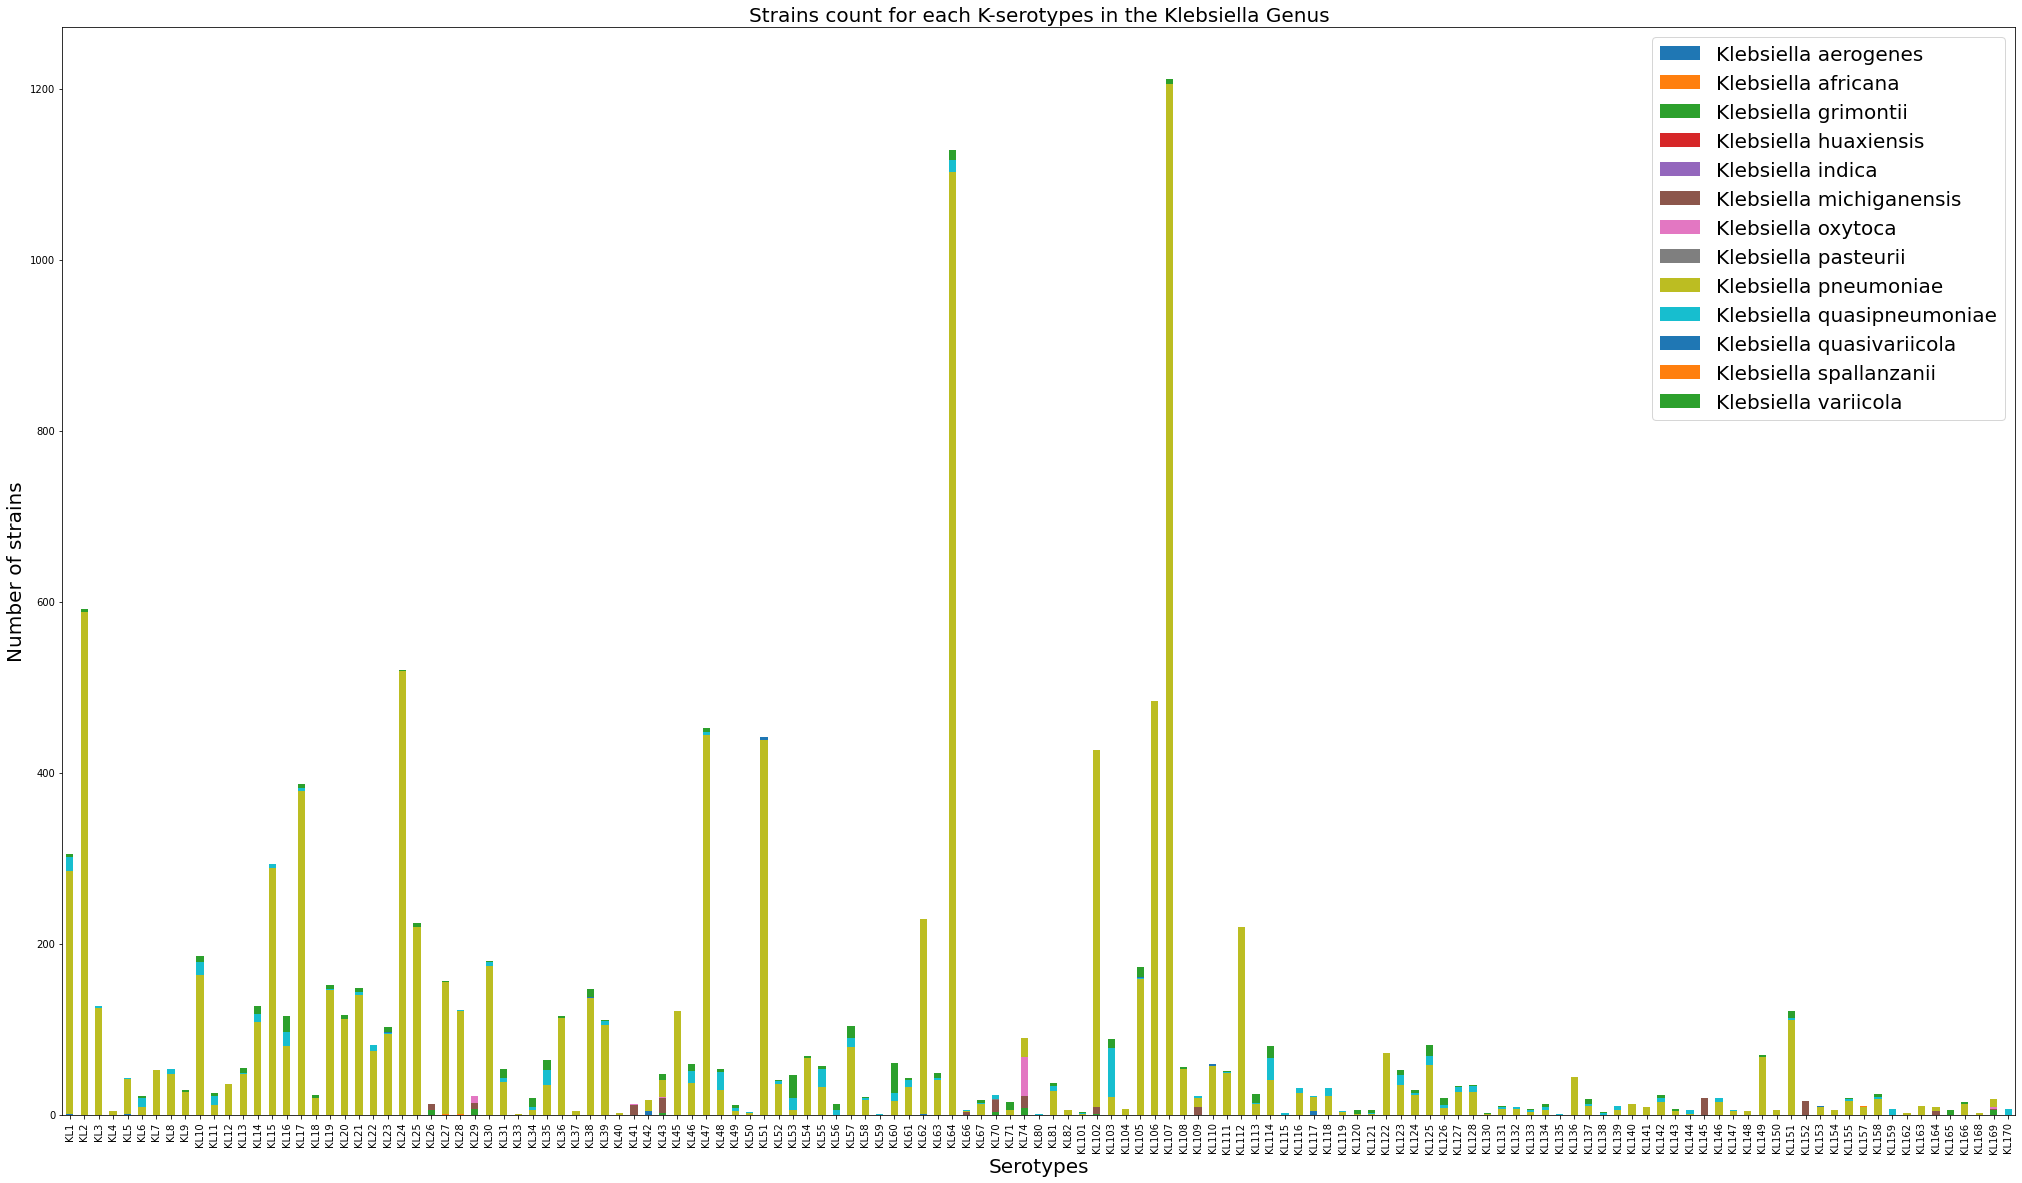

In [23]:
# Plotting the informations :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
path_R1="/home/concha-eloko/Documents/I2sysbio/Bioinformatics/prediction_depolymerase_tropism/prediction_tropism_info-master"

'''info_r1=open(f"{path_R1}/results_R1_file.tsv").read().split("\n")
list_index=[]
for index_r1, line in enumerate(info_r1):
    if index_r1 > 0 and line :
        k_num=line.split("\t")[0].split("KL")[1]
        list_index.append(k_num)
list_index.sort(key=int)

with open(f"{path_R1}/results_R1_file.sharp.tsv","w") as outfile :
    outfile.write(f"{info_r1[0]}\n")
    for index_sharp, num_sharp in enumerate(list_index):
        for index_f, line_f in enumerate(info_r1):
            if line_f.split("\t")[0]==f"KL{num_sharp}":
                outfile.write(f"{line_f}\n")
                break'''

#info_r1=pd.read_csv(f"{path_R1}/results_R1_file.sharp.tsv", sep="\t",header=0, index_col="K serotype")
info_r1=pd.read_csv(f"{path_R1}/results_R1_file.sharp.tsv", sep="\t",header=0)

save_path=f"{path_R1}/stacked_plot.strain_count.png"
title_t='Strains count for each K-serotypes in the Klebsiella Genus'
fig=info_r1[info_r1.columns.difference(["Prophage count Phispy","Total number strains"])].plot(x='K serotype', kind='bar', 
                                                                                               stacked=True, legend=False,figsize=(35,20))
plt.title(title_t,fontsize=20)
plt.xlabel('Serotypes',fontsize=20)
plt.ylabel('Number of strains',fontsize=20)
plt.legend(fontsize=20)

fig.figure.savefig(save_path,dpi='figure',format='png')

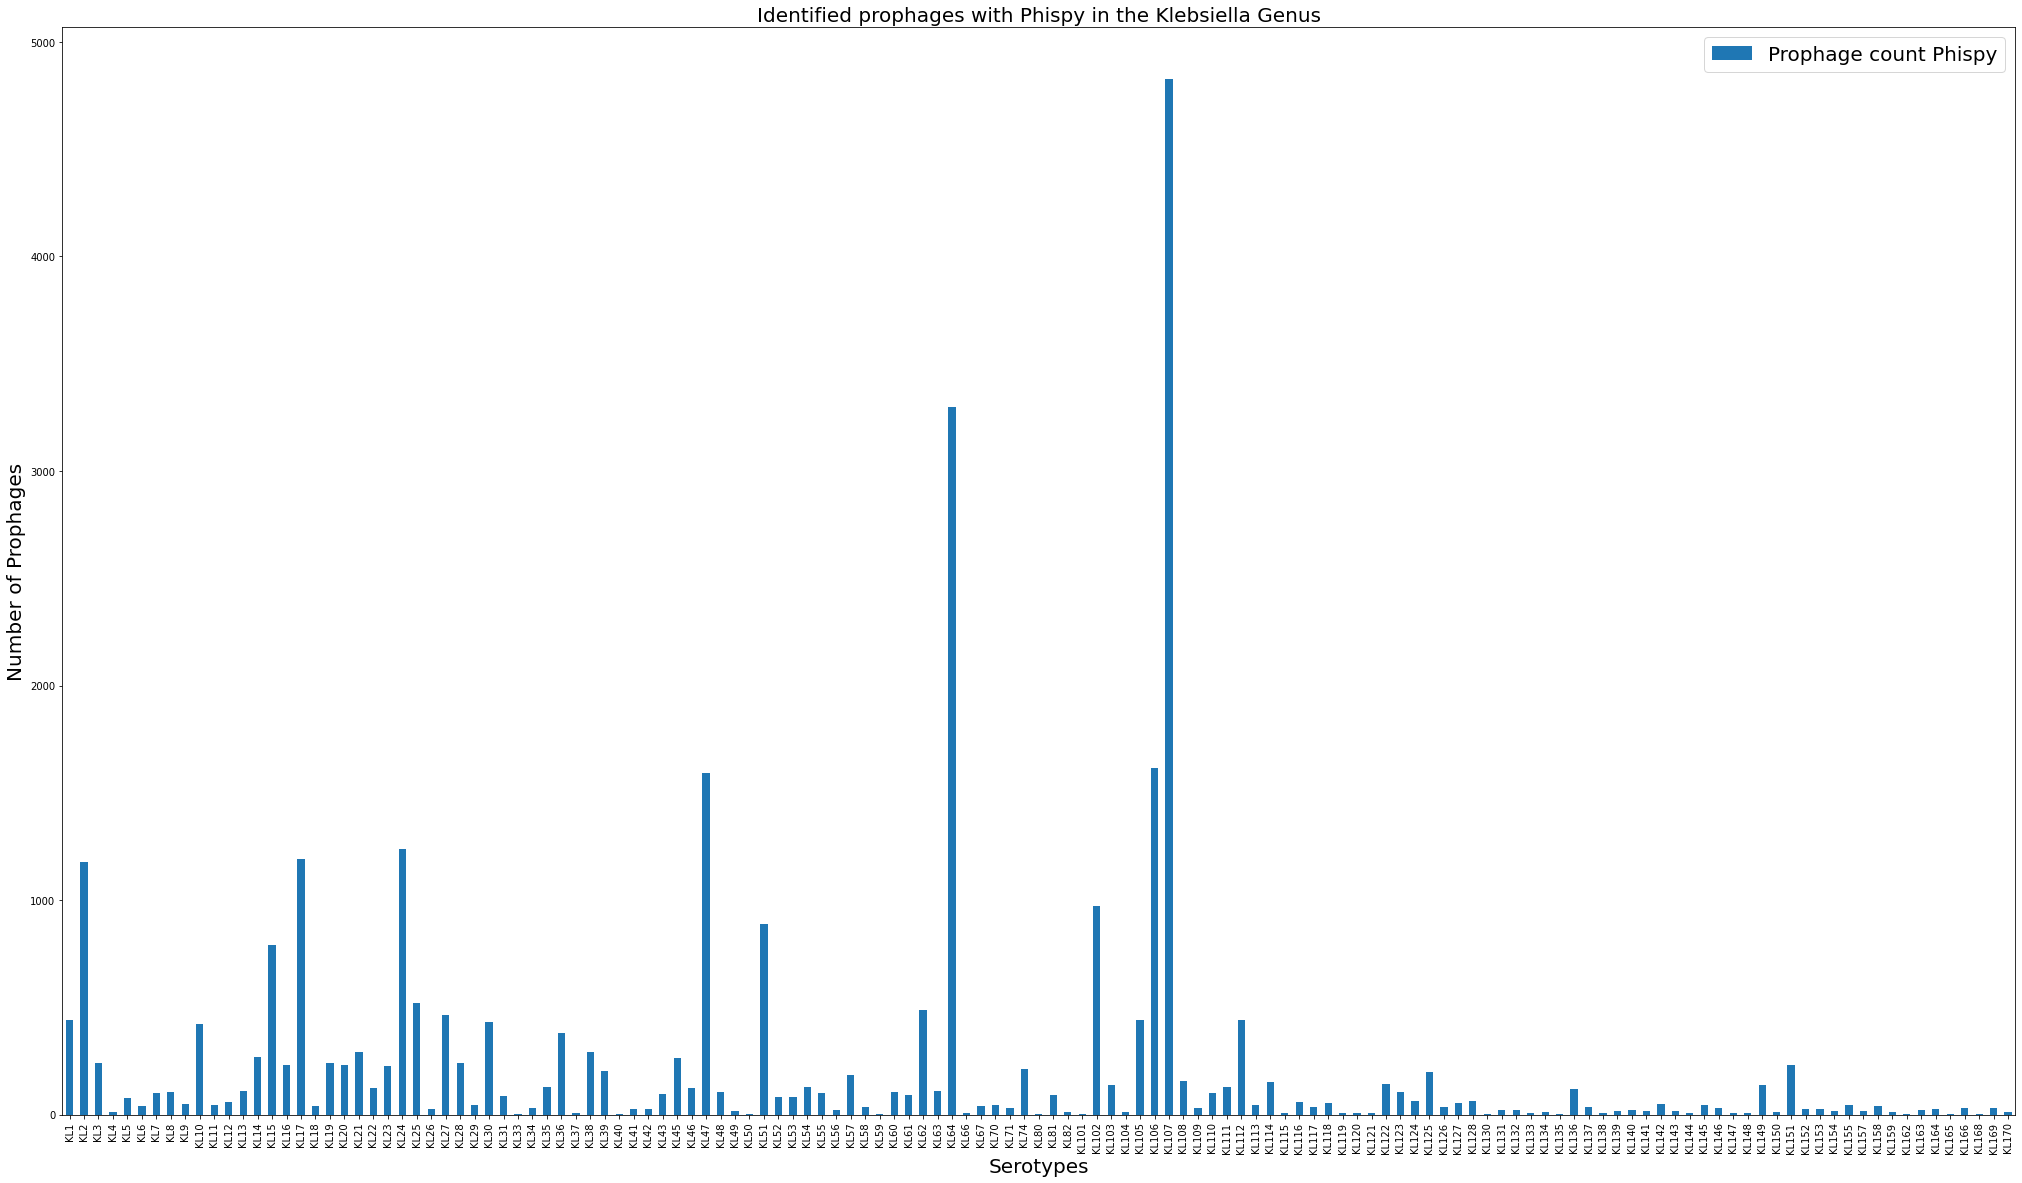

In [41]:
# Plotting the informations :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
path_R1="/home/concha-eloko/Documents/I2sysbio/Bioinformatics/prediction_depolymerase_tropism/prediction_tropism_info-master"

#info_r1=pd.read_csv(f"{path_R1}/results_R1_file.sharp.tsv", sep="\t",header=0, index_col="K serotype")
info_r1=pd.read_csv(f"{path_R1}/results_R1_file.sharp.tsv", sep="\t",header=0)

fig_2=info_r1[["Prophage count Phispy","K serotype"]].plot(x='K serotype', kind='bar', legend=False,figsize=(35,20))

save_path=f"{path_R1}/prophage_count.phispy.png"
title_t='Identified prophages with Phispy in the Klebsiella Genus'

plt.title(title_t,fontsize=20)
plt.xlabel('Serotypes',fontsize=20)
plt.ylabel('Number of Prophages',fontsize=20)
plt.legend(fontsize=20)

fig_2.figure.savefig(save_path,dpi='figure',format='png')

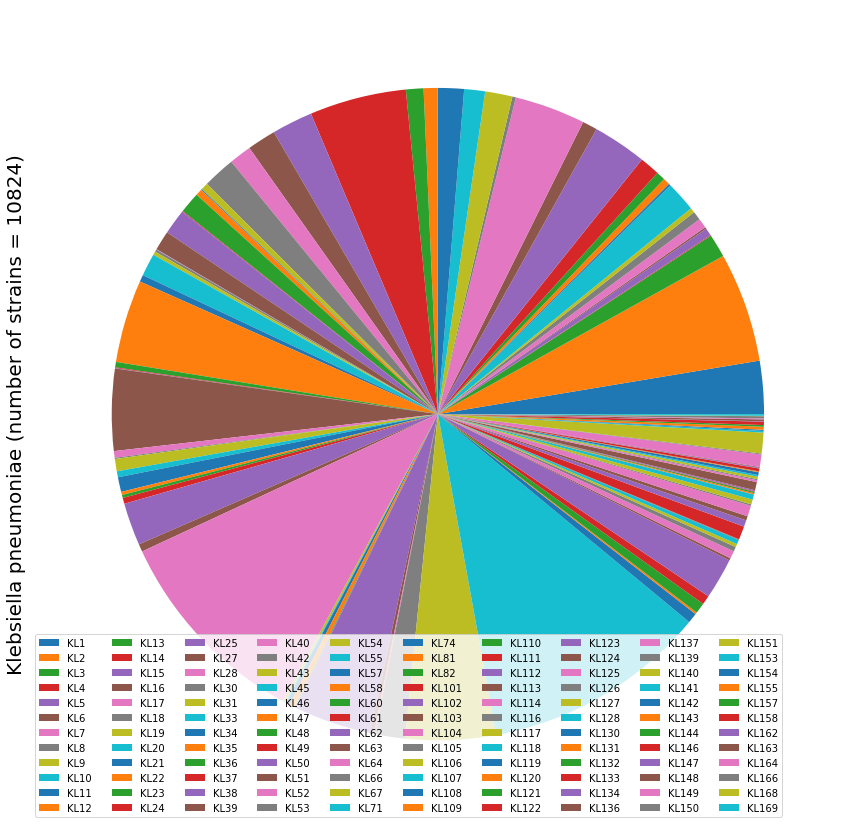

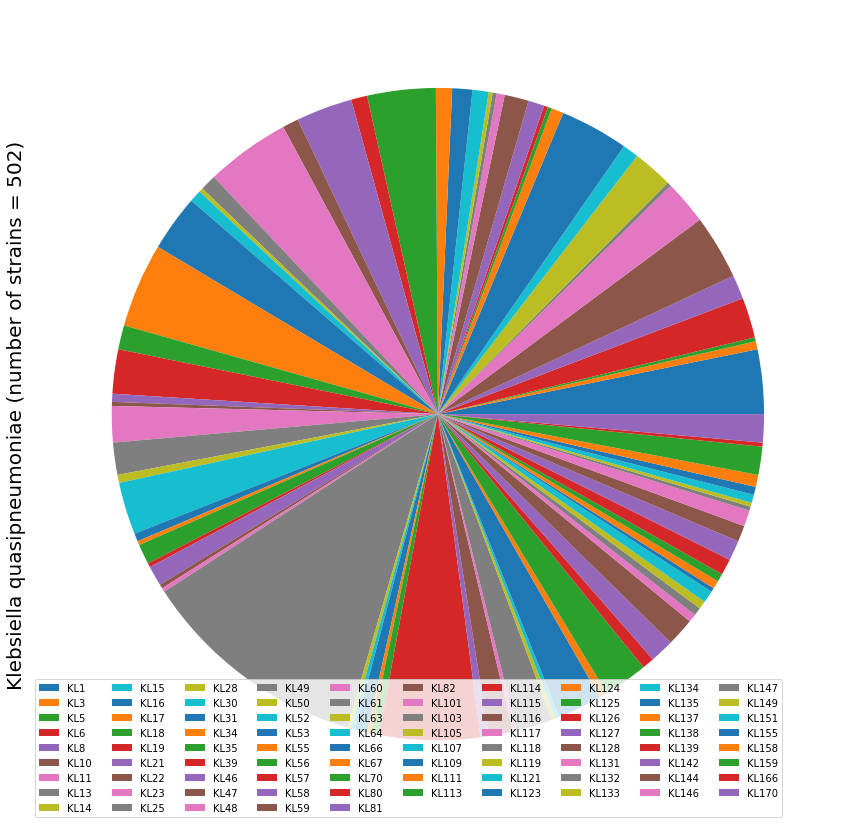

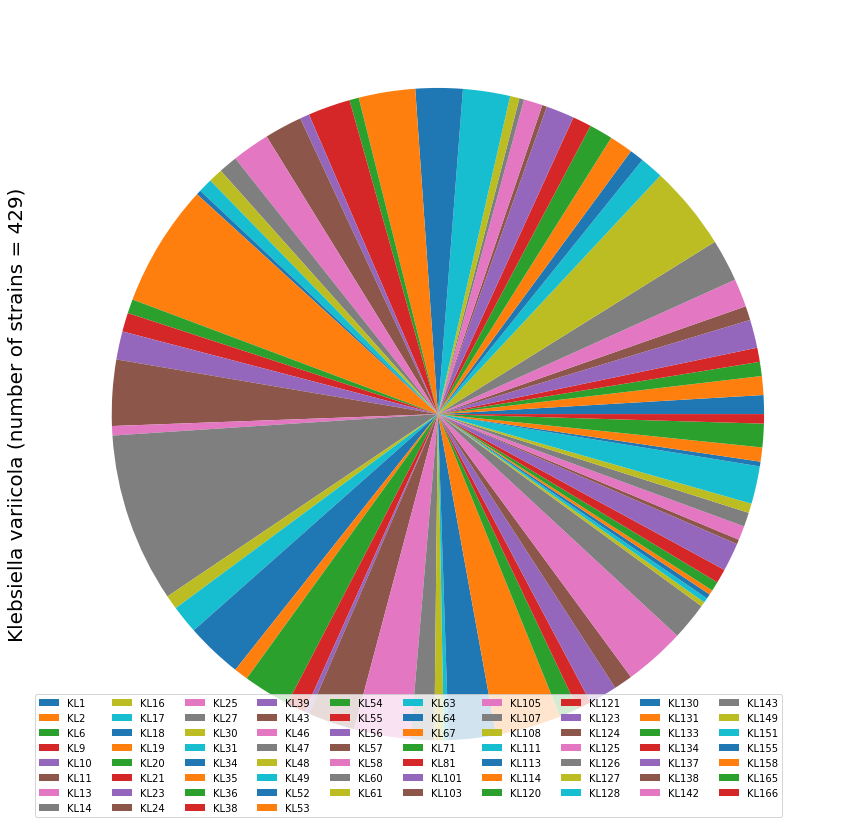

In [119]:
# Plotting the informations :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
path_R1="/home/concha-eloko/Documents/I2sysbio/Bioinformatics/prediction_depolymerase_tropism/prediction_tropism_info-master"

info_r1=pd.read_csv(f"{path_R1}/results_R1_file.sharp.tsv", sep="\t",header=0, index_col="K serotype")
info_r2=pd.read_csv(f"{path_R1}/results_R1_file.sharp.tsv", sep="\t",header=0)

save_path=f"{path_R1}/"
title_t='Strains count for each K-serotypes in the Klebsiella Genus'
species=['Klebsiella aerogenes', 'Klebsiella africana', 'Klebsiella grimontii', 'Klebsiella huaxiensis', 'Klebsiella indica', 'Klebsiella michiganensis', 'Klebsiella oxytoca', 'Klebsiella pasteurii', 'Klebsiella pneumoniae', 'Klebsiella quasipneumoniae', 'Klebsiella quasivariicola', 'Klebsiella spallanzanii', 'Klebsiella variicola']


dico_pie={"Klebsiella aerogenes" : "",
         "Klebsiella africana" : "",
         "Klebsiella grimontii" : "",
         "Klebsiella huaxiensis" : "",
         "Klebsiella indica" : "",
         "Klebsiella michiganensis" : "",
         "Klebsiella oxytoca" : "",
         "Klebsiella pasteurii" : "",
         "Klebsiella pneumoniae" : "",
         "Klebsiella quasipneumoniae": "",
         "Klebsiella quasivariicola" : "",
         "Klebsiella spallanzanii" : "",
         "Klebsiella variicola" : ""}

def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

for specie in species :
    legend_in=""
    specie_tag=specie.split(" ")[1]
    save_path=f"{path_R1}/{specie_tag}.pie_chart.png"
    specific_frame=info_r2[[specie,"K serotype"]]
    specific_fram_clean=filter_rows_by_values(specific_frame, specie, [0])
    n_tot=specific_fram_clean[specie].sum()
    #dico_pie[specie]=specific_fram_clean.plot.pie(y=specie, figsize=(15,15), labels=specific_fram_clean["K serotype"])
    if specie in ['Klebsiella pneumoniae', 'Klebsiella quasipneumoniae', 'Klebsiella variicola'] :
        dico_pie[specie]=specific_fram_clean.plot.pie(y=specie, figsize=(15,15), labels=None)
        plt.legend(loc="best", ncol=10, labels=specific_fram_clean["K serotype"])
        plt.ylabel(f"{specie} (number of strains = {n_tot})", fontsize=20)
        dico_pie[specie].figure.savefig(save_path,dpi='figure',format='png',)
    else :
        legend_in=plt.legend(loc="best")
        plt.ylabel(f"{specie} (number of strains = {n_tot})", fontsize=20)
        dico_pie[specie]=specific_fram_clean.plot.pie(y=specie, figsize=(15,15), labels=specific_fram_clean["K serotype"],autopct='%.1f%%')
        dico_pie[specie].figure.savefig(save_path,dpi='figure',format='png',)

Species          Strains K-serotype  \
0      Klebsiella quasipneumoniae  GCF_016066695.1       KL10   
1      Klebsiella quasipneumoniae  GCF_016066695.1       KL10   
2      Klebsiella quasipneumoniae  GCF_002853675.1       KL30   
3      Klebsiella quasipneumoniae  GCF_002853675.1       KL30   
4      Klebsiella quasipneumoniae  GCF_009647945.1      KL146   
...                           ...              ...        ...   
18019   Klebsiella quasivariicola  GCF_002269255.1      KL153   
18020   Klebsiella quasivariicola  GCF_002269255.1      KL153   
18021   Klebsiella quasivariicola  GCF_900172085.1       KL38   
18022   Klebsiella quasivariicola  GCF_007575185.1      KL110   
18023   Klebsiella quasivariicola  GCF_900509405.2       KL51   

         Prophage name  Prophage genome length  
0       GOFFADNL_1_PP1                   27381  
1       GOFFADNL_1_PP2                   21633  
2      KNONBIHK_29_PP1                   17370  
3      KNONBIHK_67_PP2                   12053  
4       HCCNJLEP_1_PP1                   52172  
...                ...                     ...  
18019   MMBADCEP_1_PP4                   30577  
18020   MMBADCEP_4_PP5                   13085  
18021  IFIHIOEF_24_PP1                   25684  
18022  JNPDCAJM_40_PP1                   34473  
18023   CBFCAEAP_4_PP1                   37974  

[18024 rows x 5 columns]

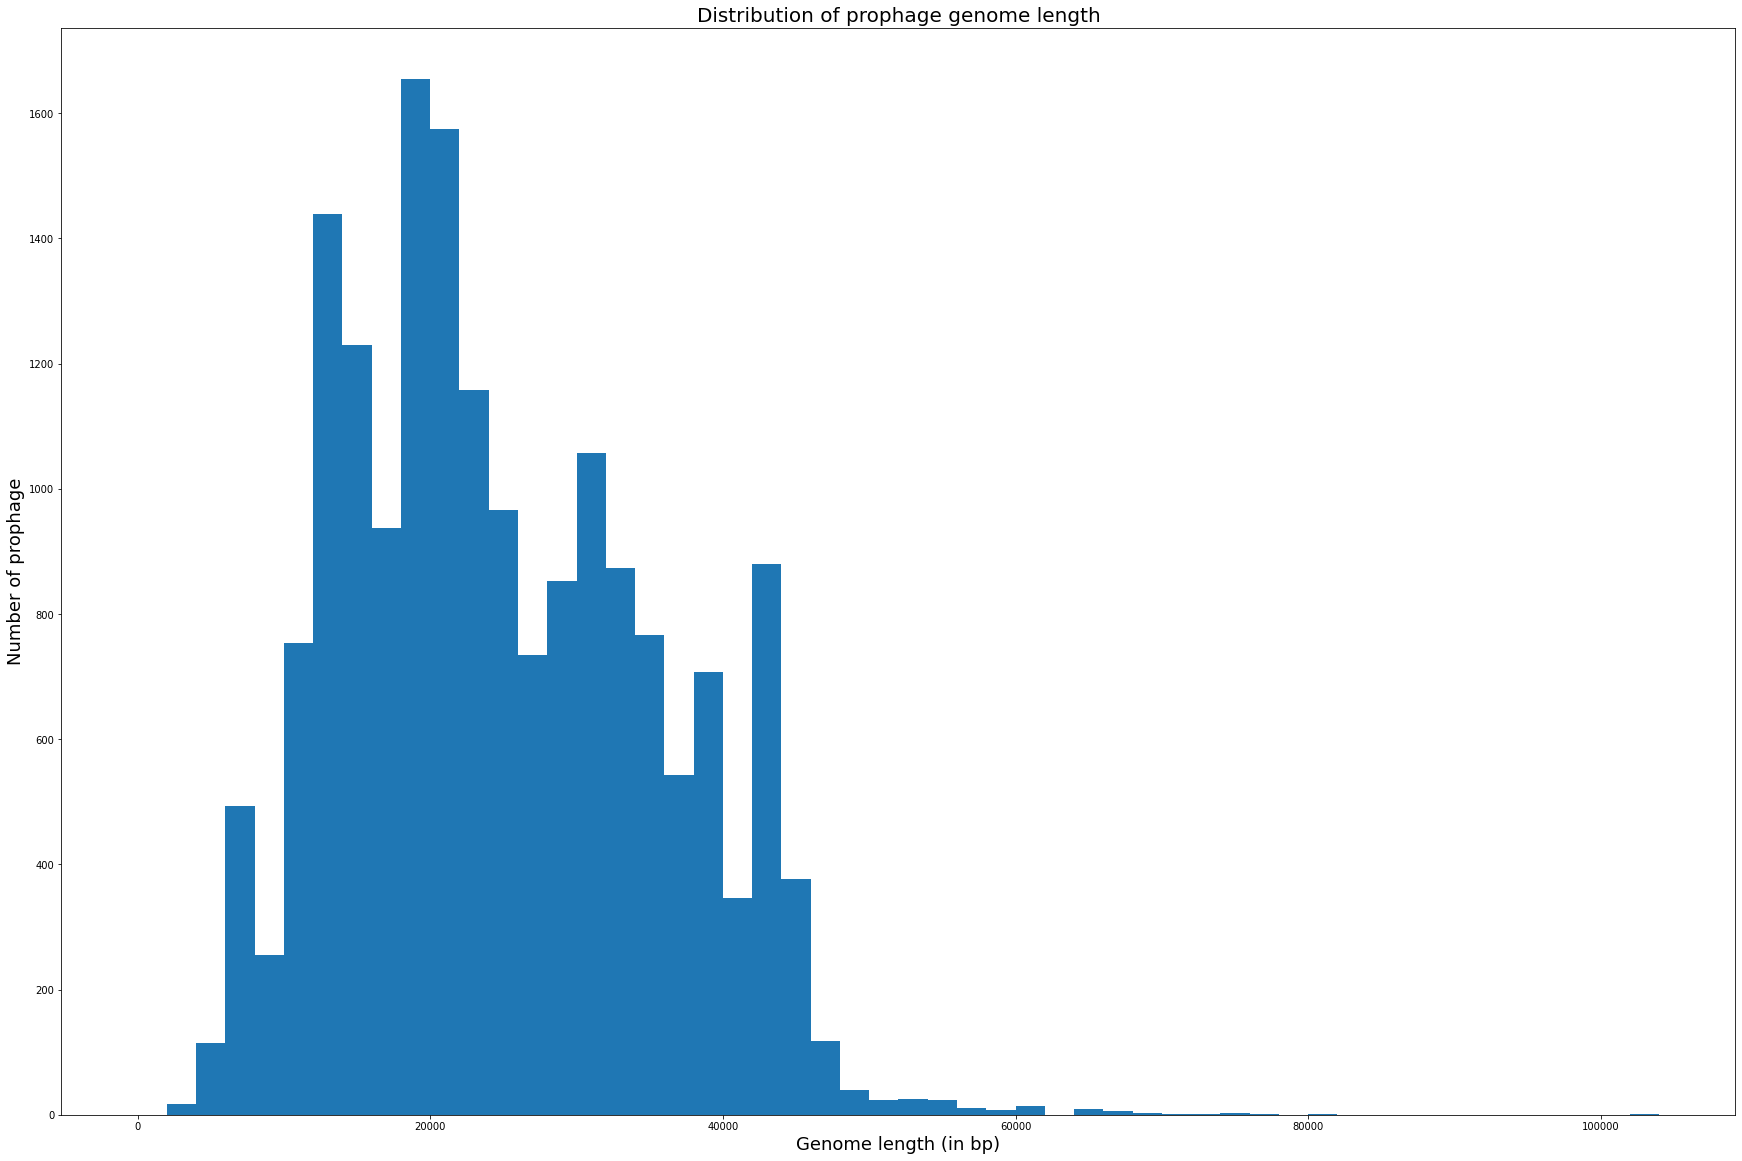

In [1]:
# The prophage information (size):
# classic Histogram
from os import system, listdir, chdir, mkdir
from os.path import isdir
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
path_R1="/home/concha-eloko/Documents/I2sysbio/Bioinformatics/prediction_depolymerase_tropism/prediction_tropism_info-master"

info_prophage=pd.read_csv(f"{path_R1}/results_R1_file.complete.tsv", sep="\t",)
info_prophage.columns=["Species", "Strains","K-serotype","Prophage name","Prophage genome length"]

#values=info_prophage["Prophage genome length"].max()

bins=[num for num in range(0,105000,2000)]

plt.figure(figsize=(30,20))
plt.hist(info_prophage["Prophage genome length"], bins, histtype="bar",)
plt.xlabel("Genome length (in bp)", size=18)
plt.ylabel("Number of prophage", size=18)
plt.title("Distribution of prophage genome length", size=20)

histo=plt.gcf()
#histo.savefig(f"{path_R1}/histogram_distribution_prophage_length.png",dpi='figure',format='png',)

#plt.show()
info_prophage

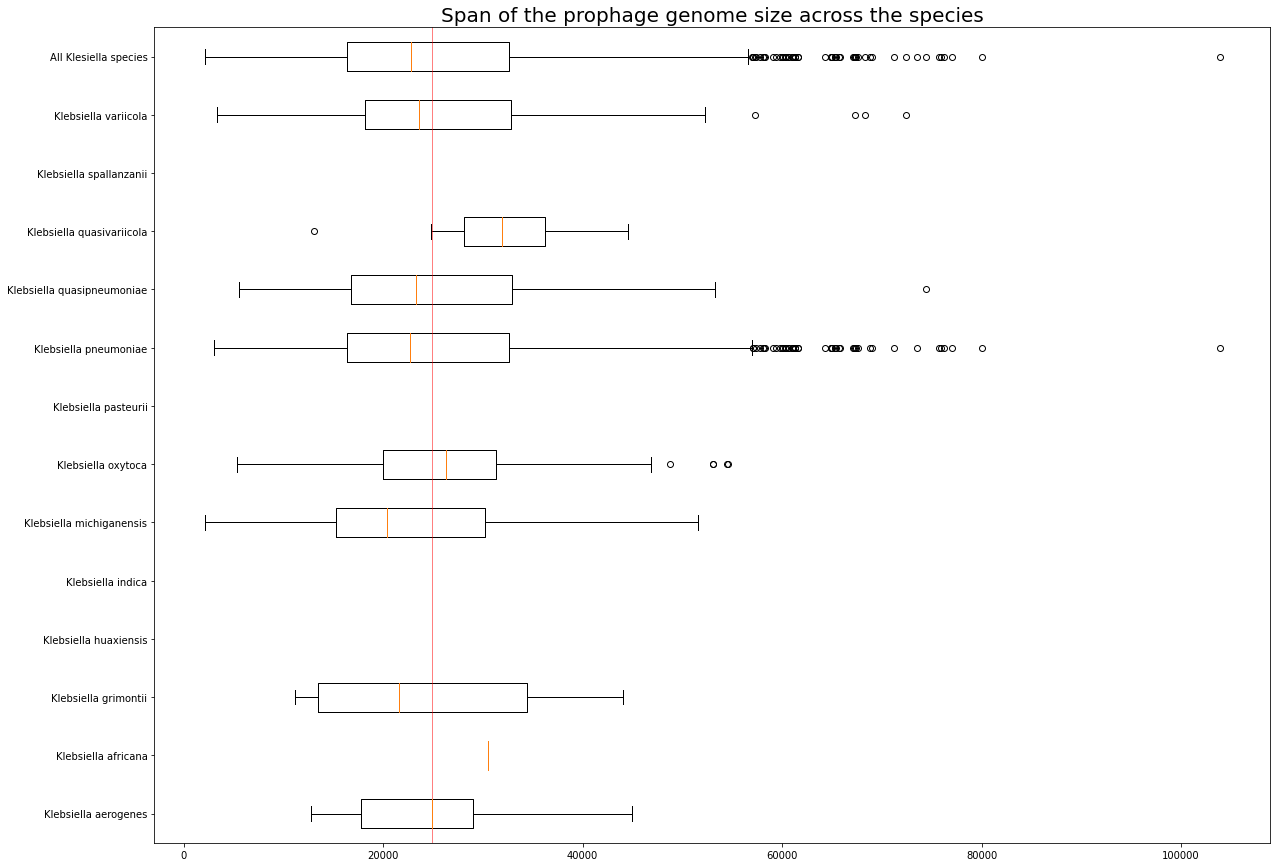

In [69]:
# The prophage information (size):
# box plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
path_R1="/home/concha-eloko/Documents/I2sysbio/Bioinformatics/prediction_depolymerase_tropism/prediction_tropism_info-master"

info_prophage=pd.read_csv(f"{path_R1}/results_R1_file.complete.tsv", sep="\t",)
info_prophage.columns=["Species", "Strains","K-serotype","Prophage name","Prophage genome length"]

species=['Klebsiella aerogenes', 'Klebsiella africana', 'Klebsiella grimontii', 'Klebsiella huaxiensis', 'Klebsiella indica', 'Klebsiella michiganensis', 'Klebsiella oxytoca', 'Klebsiella pasteurii', 'Klebsiella pneumoniae', 'Klebsiella quasipneumoniae', 'Klebsiella quasivariicola', 'Klebsiella spallanzanii', 'Klebsiella variicola']
v_plots=[]



fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(20)

ax.set_title('Span of the prophage genome size across the species', size=20)


for specie in species :
    info_specie=info_prophage[info_prophage.Species.isin([specie])]["Prophage genome length"]
    v_plots.append(info_specie)

v_plots.append(info_prophage["Prophage genome length"])
species.append('All Klesiella species')

box=ax.boxplot(v_plots, vert= False, labels=species, meanline=True)
plt.axvline(24862, color='r', lw=0.5)
fig.savefig(f"{path_R1}/prophage_genome_length.box_plot.png",dpi='figure',format='png',)
#v_plots



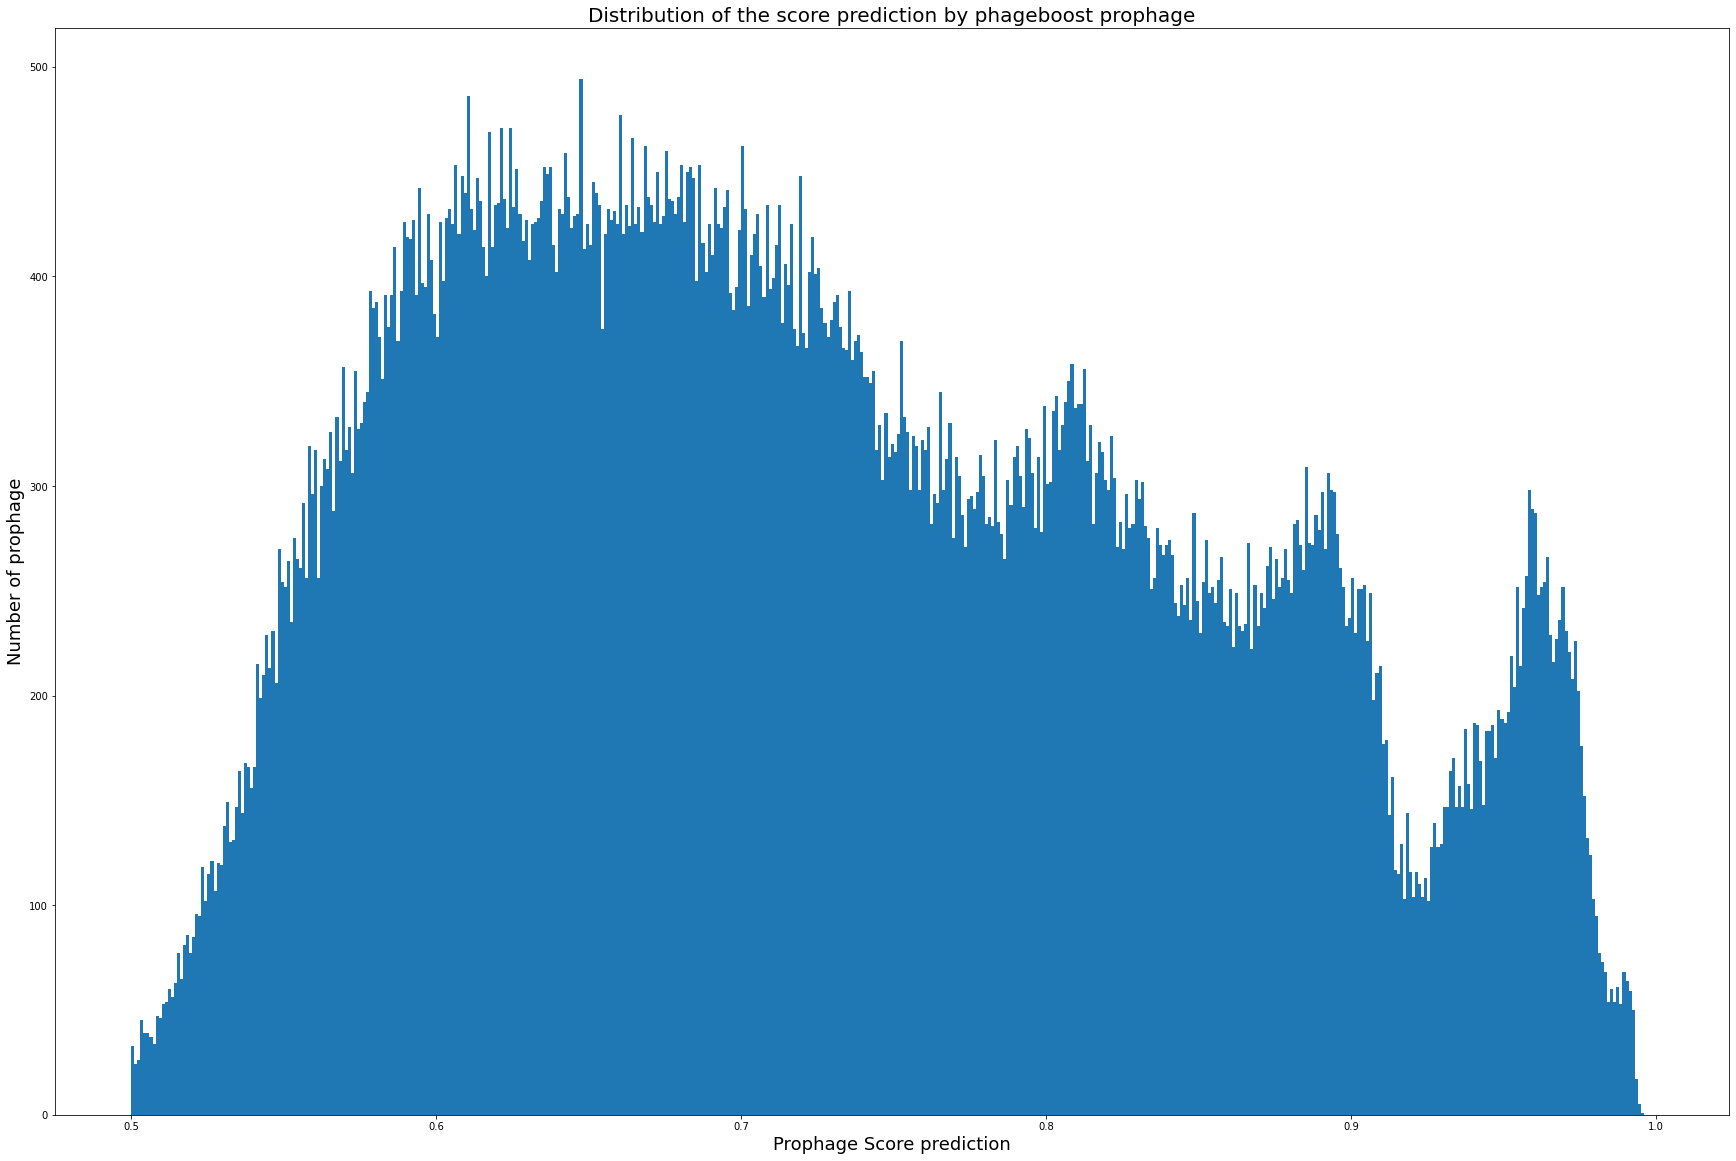

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

path_phageboost="/home/concha-eloko/Documents/I2sysbio/Bioinformatics/prediction_depolymerase_tropism/prophage_prediction/phageboost_info-master"

title_df=["Stain","Score"]
info_prophage=pd.read_csv(f"{path_phageboost}/score_distribution.phageboost.csv", sep=",",)
info_prophage.columns =title_df

info_prophage

float_range_array = np.arange(0.5, 1, 0.001)
bins = list(float_range_array)

plt.figure(figsize=(30,20))
plt.hist(info_prophage["Score"], bins, histtype="bar",)
plt.xlabel("Prophage Score prediction", size=18)
plt.ylabel("Number of prophage", size=18)
plt.title("Distribution of the score prediction by phageboost prophage", size=20)
histo=plt.gcf()
histo.savefig(f"{path_phageboost}/histogram_distribution_prophage_score.phageboost.png",dpi='figure',format='png',)
